In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from google.colab import files
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDER_PATH = 'drive/MyDrive/SKRIPSI/color_transfer/'
dark_photo = FOLDER_PATH + '3.jpg'
medium_photo = FOLDER_PATH + '2.jpg'

In [ ]:
def gamma_correction(gamma, image):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv2.LUT(image, lookUpTable)
    return res

def color_transfer(source, target):
	# convert the images from the RGB to L*ab* color space, being
	# sure to utilizing the floating point data type (note: OpenCV
	# expects floats to be 32-bit, so use that instead of 64-bit)
	source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
	target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")
 	# compute color statistics for the source and target images
	(lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
	(lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
	# subtract the means from the target image
	(l, a, b) = cv2.split(target)
	l -= lMeanTar
	a -= aMeanTar
	b -= bMeanTar
	# scale by the standard deviations
	l = (lStdTar / lStdSrc) * l
	a = (aStdTar / aStdSrc) * a
	b = (bStdTar / bStdSrc) * b
	# add in the source mean
	l += lMeanSrc
	a += aMeanSrc
	b += bMeanSrc
	# clip the pixel intensities to [0, 255] if they fall outside
	# this range
	l = np.clip(l, 0, 255)
	a = np.clip(a, 0, 255)
	b = np.clip(b, 0, 255)
	# merge the channels together and convert back to the RGB color
	# space, being sure to utilize the 8-bit unsigned integer data
	# type
	transfer = cv2.merge([l, a, b])
	transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)
	
	# return the color transferred image
	return transfer

def image_stats(image):
	# compute the mean and standard deviation of each channel
	(l, a, b) = cv2.split(image)
	(lMean, lStd) = (l.mean(), l.std())
	(aMean, aStd) = (a.mean(), a.std())
	(bMean, bStd) = (b.mean(), b.std())
	# return the color statistics
	return (lMean, lStd, aMean, aStd, bMean, bStd)

# **Program**

In [ ]:
SOURCE_PATH = 'drive/MyDrive/SKRIPSI/ct_eval/'

warna_kulit = "kuning langsat" #@param ["putih pucat", "kuning langsat", "gelap"]

source = cv2.imread(SOURCE_PATH + 'before16.png')
gamma = 0

if warna_kulit == "putih pucat":
    gamma = 0.8
    result = gamma_correction(gamma, source)
elif warna_kulit == "kuning langsat":
    gamma = 0.85
    target = cv2.imread(medium_photo)
    result = color_transfer(target, source)
    result = gamma_correction(gamma, result)
elif warna_kulit == "gelap":
    gamma = 1.2
    target = cv2.imread(dark_photo)
    result = color_transfer(target, source)
    result = gamma_correction(gamma, result)
else:
    print("error")


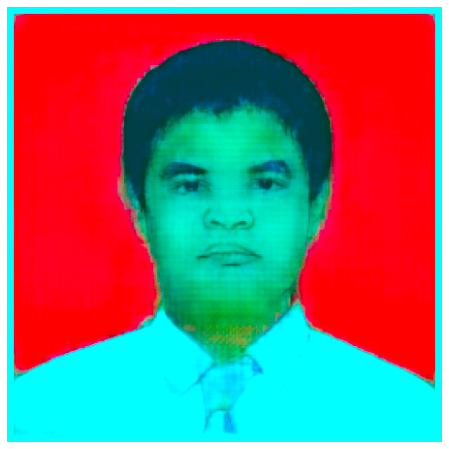

In [ ]:
src = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))

display_list = [res]
title = ['Corrected']

for i in range(1):
    plt.subplot(1, 1, i+1)
    # plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
plt.show()